In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [4]:
# CSV uploaden
df = pd.read_csv("../K2_MEN_DATASET.csv", error_bad_lines=False, sep=",")

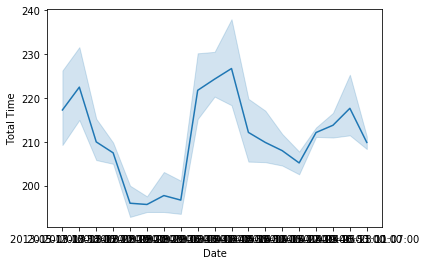

In [5]:
TimesInAFinal = df[(df["Competition Round_HEAT"])]
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="Total Time")

In [6]:
TimesInAFinal = df[(df["Competition Round_HEAT"])]
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="N1Time")

ValueError: Could not interpret input 'N1Time'

In [24]:
TimesInAFinal = df[(df["Competition Round_HEAT"])].drop_duplicates(["Date"])
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="N1Time")

ValueError: Could not interpret input 'N1Time'

In [0]:
semifinalTimes = df[(df["Competition Round_SEMIFINAL"] == True)]
ax = sns.catplot(data=semifinalTimes,x="Reached_FINAL_A",y = "Total Time",hue="Place",kind="swarm")

In [0]:
ax = sns.pairplot(data=df,vars=["split time 1", "split time 2", "split time 3", "Total Time"], kind="reg")


In [0]:
ax = sns.pairplot(data=df,vars=["D0_250", "D250_500", "D500_750","D750_1000","Total Time"], kind="reg")

In [0]:
%matplotlib inline
ax = sns.boxplot(x=df["Total Time"],y=df["Place"],showfliers=False)
ax.set(xlim=(185, 240))

In [0]:
ax = sns.boxplot(x=df["D0_250"],y=df["Place"],showfliers=False)
ax.set(xlim=(40, 65))


In [0]:
bx = sns.boxplot(x=df["D250_500"],y=df["Place"],showfliers=False)
bx.set(xlim=(40, 65))

In [0]:
cx = sns.boxplot(x=df["D500_750"],y=df["Place"],showfliers=False)
cx.set(xlim=(40, 65))

In [0]:
CountriesInAFinal = df[(df["Competition Round_FINAL A"] == True) & (df["Final Rank"] <4)]
groupedCountries = CountriesInAFinal.groupby("Country").size()
groupedCountries.plot.bar()

In [0]:
CountriesInAFinal = df[(df["Competition Round_FINAL A"] == True)]
groupedCountries = CountriesInAFinal.groupby("Country").size()
groupedCountries.plot.bar()

In [0]:
CountriesInBFinal = df[(df["Competition Round_SEMIFINAL"] == True)]
groupedCountries = CountriesInBFinal.groupby("Country").size()
groupedCountries.plot.bar()

In [0]:
CountriesInBFinal = df[(df["Competition Round_FINAL B"] == True)]
groupedCountries = CountriesInBFinal.groupby("Country").size()
groupedCountries.plot.bar()

In [0]:
StrandedCountries = df[(df["Competition Round_FINAL C"] == False) & (df["Competition Round_SEMIFINAL"] == False)& (df["Competition Round_FINAL B"] == False) & (df["Competition Round_FINAL A"] == False) & (df["Reached_FINAL_A"]  == False ) & (df["Reached_SEMI"]  == False )]
groupedCountries = StrandedCountries.groupby("Country").size()
groupedCountries.plot.bar()

In [0]:
sns.catplot(x="Reached_FINAL_A", y="Total Time", hue="Place" ,kind="swarm", data=df)

In [0]:
!pip install pandas-profiling[notebook,html]
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="K2_pandas_profiling.html")

In [0]:
data = df[(df["Competition Round_HEAT"] == True) & df["Reached_FINAL_A"] == True]
groups = data.groupby("Final Rank").size()
groups.plot.bar()

In [0]:
onlyTop3 = df[(df["Final Rank"] < 4)]
groups = onlyTop3.groupby("Date")["Total Time"].mean().to_frame(name="Top3Avg").reset_index()
print(groups)
merge = pd.merge(df,groups,on="Date",how="outer",)
print(merge.head(50))